In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import binascii
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans

In [ ]:
!curl -o "sample.jpg" "https://pbs.twimg.com/media/FYS2j1FXgAAFt18?format=jpg&name=large"
test_file = "sample.jpg"

In [ ]:
def HexaColor(color: list):
    code = binascii.hexlify(bytearray(int(c) for c in color)).decode('ascii')
    return f"#{code}"

HexaColor(color=[38.16752708, 42.40181722, 46.99977371])

Original image shape is  (1428, 1080, 3)


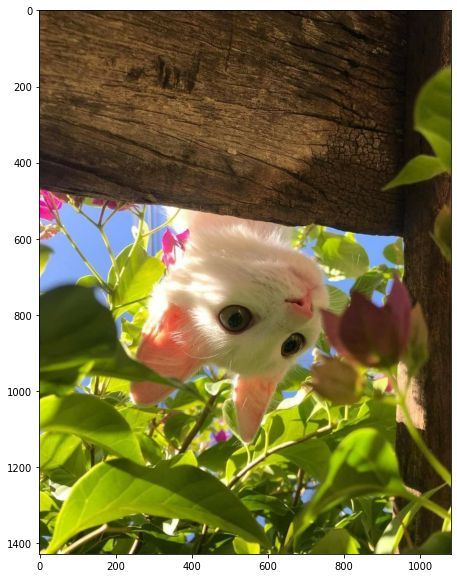

In [ ]:
NUM_CLUSTERS = 15 

original_image = cv2.imread(test_file)[...,::-1]
image = original_image.copy()
print('Original image shape is ', original_image.shape)
plt.figure(figsize=(12, 10));plt.imshow(original_image);

Original Dimensions :  (1428, 1080, 3)
After resizing shape is (1142, 864, 3)


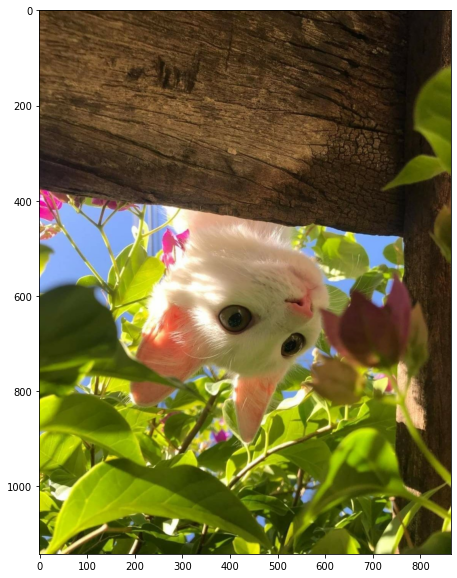

In [ ]:
print('Original Dimensions : ',image.shape)
 
scale_percent = 0.80 # percent of original size
width = int(image.shape[1] * scale_percent )
height = int(image.shape[0] * scale_percent )
dim = (width, height)
  
# resize image
scale_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print(f'After resizing shape is {scale_image.shape}')

plt.figure(figsize=(12, 10));plt.imshow(scale_image);

In [ ]:
flatten_image = np.reshape(image, (-1, 3)) # n * 3
print(f'After Flattening shape is {flatten_image.shape}')

After Flattening shape is (1542240, 3)


In [ ]:
cluster_model = MiniBatchKMeans(
    n_clusters = NUM_CLUSTERS, 
    init = "k-means++",
    max_iter = 20,
    random_state = 1000
)
cluster_model.fit(flatten_image)
cluster_colors = cluster_model.cluster_centers_
print(f'Image Clusters are: \n{cluster_colors}')

Image Clusters are: 
[[143.80606245 163.90608056  10.94019497]
 [ 67.38747619  79.03647765   6.05052851]
 [231.6715528  212.85884641 155.16186615]
 [193.13226015 165.4384693  118.63736433]
 [ 62.39780109  46.29963246  21.80526224]
 [141.64062683 174.89277549 239.08112348]
 [123.37095021  94.71739068  54.74393872]
 [193.74822416 210.50943161  16.63578143]
 [ 36.81415199  27.66473689   9.9326087 ]
 [ 93.7070922   67.53839571  38.06346666]
 [249.00289919 244.52265511 223.13477096]
 [196.80373323 102.75756968  84.88883473]
 [ 98.84473186 112.44542481  10.01258931]
 [147.34207053 129.70501524  72.46668478]
 [137.97101612 152.11997978 164.85142953]]


## Segmented Image

(1428, 1080, 3)


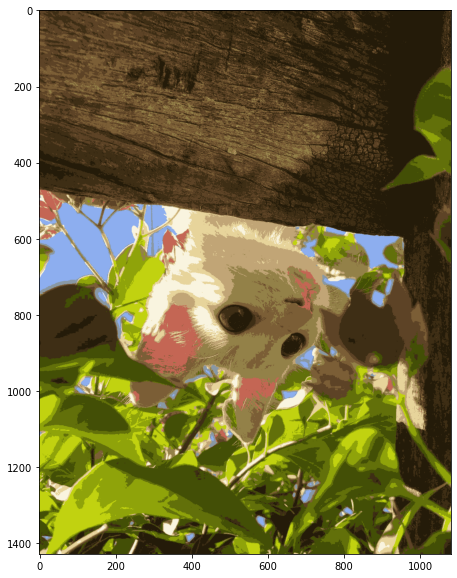

In [ ]:
cluster_image = cluster_model.cluster_centers_[cluster_model.labels_].reshape(image.shape)
cluster_image = np.uint(cluster_image)
print(cluster_image.shape)
plt.figure(figsize=(12, 10));plt.imshow(cluster_image);

Dominate colors are the cluster_centers_ of an image.

In [ ]:
def Percentages_DominantColors(flatten_image, cluster_centers, labels):
    dominant_colors = np.array(
        cluster_centers,
        dtype='uint'
    )  # (5, 3)
    colors_counts = np.unique(
        labels,
        return_counts=True
    )[1]
    percentages = colors_counts / flatten_image.shape[0]  # (5,)
    percentages_dominant_colors = pd.DataFrame(
        zip(percentages, dominant_colors),
        columns=['Percentage', 'Color']
    )
    percentages_dominant_colors['HexaColor'] = percentages_dominant_colors['Color'].map(lambda a: HexaColor(a))
    return percentages_dominant_colors.sort_values(['Percentage'], ascending=[False], ignore_index=True)

df = Percentages_DominantColors(
    flatten_image,
    cluster_model.cluster_centers_,
    cluster_model.labels_
)
df

,Percentage,Color,HexaColor
0,0.175379,"[62, 46, 21]",#3e2e15
1,0.148985,"[36, 27, 9]",#241b09
2,0.114924,"[93, 67, 38]",#5d4326
3,0.097982,"[67, 79, 6]",#434f06
4,0.077702,"[123, 94, 54]",#7b5e36
5,0.076196,"[98, 112, 10]",#62700a
6,0.057437,"[143, 163, 10]",#8fa30a
7,0.056540,"[147, 129, 72]",#938148
8,0.043755,"[193, 210, 16]",#c1d210
9,0.039260,"[193, 165, 118]",#c1a576


[62 46 21]
[36 27  9]
[93 67 38]
[67 79  6]
[123  94  54]
[ 98 112  10]
[143 163  10]
[147 129  72]
[193 210  16]
[193 165 118]
[141 174 239]
[231 212 155]
[249 244 223]
[196 102  84]
[137 152 164]


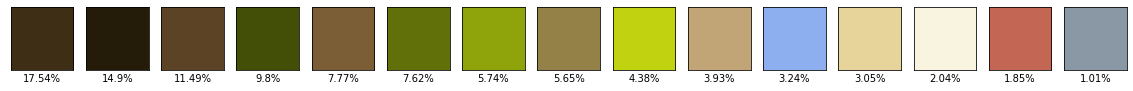

In [ ]:
BLOCK_SIZE = 50
color_block = np.zeros( (BLOCK_SIZE, BLOCK_SIZE, 3), dtype='uint' )

plt.figure(figsize=(20, 12))

for index in range(NUM_CLUSTERS):
    percentage, dominant_color = df['Percentage'][index], df['Color'][index]
    plt.subplot(1, NUM_CLUSTERS, index+1)
    print(dominant_color)
    color_block[:] = dominant_color
    plt.xticks([]);plt.yticks([]); 
    plt.xlabel( f"{round(percentage * 100, 2)}%" )
    plt.imshow(color_block)

204
start 0, end 189
start 189, end 349
start 349, end 473
start 473, end 578
start 578, end 661
start 661, end 743
start 743, end 805
start 805, end 866
start 866, end 913
start 913, end 955
start 955, end 989
start 989, end 1021
start 1021, end 1043
start 1043, end 1062
start 1062, end 1072


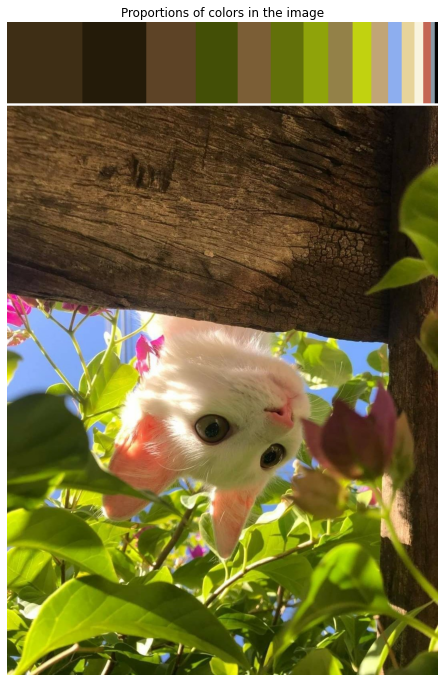

In [ ]:
BAR_HEIGHT, BAR_WIDTH = int(original_image.shape[0]//7.0), original_image.shape[1]
print(BAR_HEIGHT)
bar = np.ones((BAR_HEIGHT, BAR_WIDTH, 3), dtype=np.uint8)
line_in_between = np.ones((6, BAR_WIDTH, 3), dtype=np.uint8) * 255 

start, index = 0, 1
for index in range(NUM_CLUSTERS):
    percentage, dominant_color = df['Percentage'][index], df['Color'][index]
    end = start + int(percentage * BAR_WIDTH)
    print(f"start {start}, end {end}")
    if index == NUM_CLUSTERS: # last color/cluster 
        bar[:, start:] = dominant_color
    else:
        bar[:, start:end] = dominant_color
    start = end # new start is last end
    index += 1

palette_image = np.vstack((bar, line_in_between, original_image))

plt.figure(figsize = (14, 12));
plt.title('Proportions of colors in the image');
plt.axis("off");
plt.imshow(palette_image);

start 1178, end 1428
start 966, end 1178
start 802, end 966
start 663, end 802
start 553, end 663
start 445, end 553
start 363, end 445
start 283, end 363
start 221, end 283
start 165, end 221
start 119, end 165
start 76, end 119
start 47, end 76
start 21, end 47
start 7, end 21


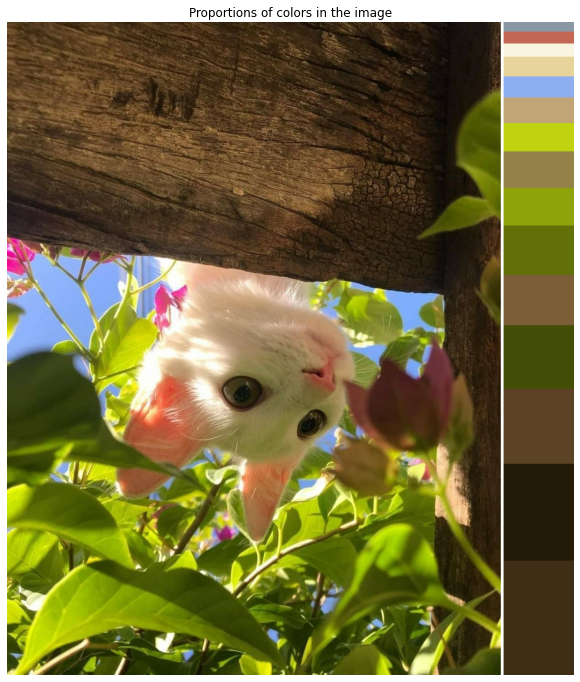

In [ ]:
BAR_HEIGHT, BAR_WIDTH = original_image.shape[0], int(original_image.shape[1]//7.0)
bar = np.ones((BAR_HEIGHT, BAR_WIDTH, 3), dtype='uint')
line_in_between = np.ones((BAR_HEIGHT, 6, 3), dtype='uint') * 255 

end = BAR_HEIGHT
for index in range(NUM_CLUSTERS):
    percentage, dominant_color = df['Percentage'][index], df['Color'][index]
    start = end - int(percentage * BAR_HEIGHT)
    print(f"start {start}, end {end}")
    bar[start:end, :] = dominant_color
    end = start # new start is last end

bar[:end, :] = dominant_color # 255 # offset

palette_image = np.hstack((original_image, line_in_between, bar))

plt.figure(figsize = (14, 12));
plt.title('Proportions of colors in the image')
plt.axis("off");
plt.imshow(palette_image);

(900, 900)


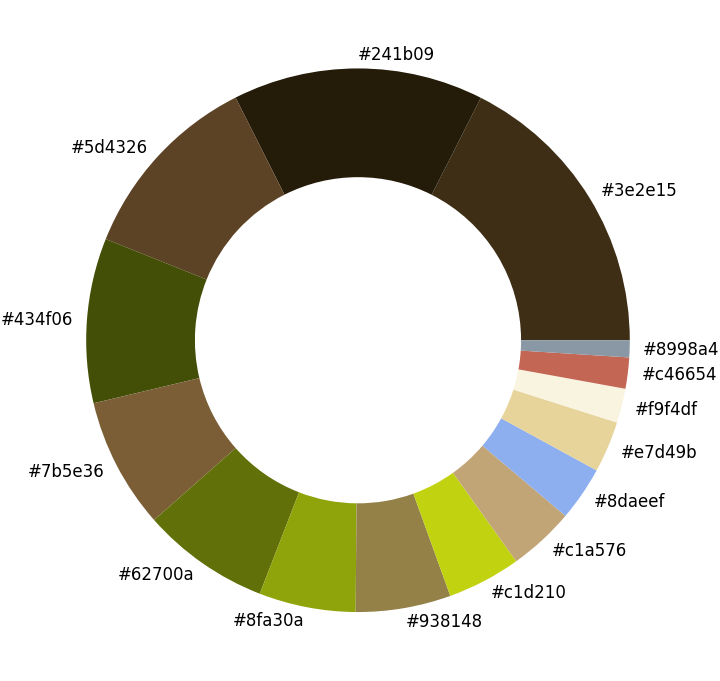

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas



fig, ax = plt.subplots( figsize=(90,90), dpi=10 )
canvas = FigureCanvas(fig)

wedges, text = ax.pie(
    df['Percentage'],
    labels = df['HexaColor'],
    labeldistance= 1.05,
    colors = df['HexaColor'],
    textprops={'fontsize': 120, 'color':'black'}
)
plt.setp(wedges, width=0.4);

canvas.draw()       # draw the canvas, cache the renderer
image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
print(fig.canvas.get_width_height())
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

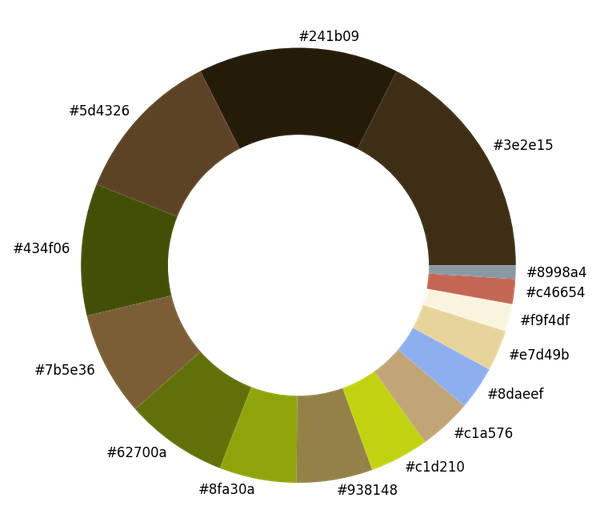